<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-analisis-tecnico/blob/main/ES_TA_Cap%C3%ADtulo_04_Estrategias_con_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/04/cropped-Logo_Quantreo_transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>

# Estrategias con RSI

Para crear la estrategia de esta secci√≥n, vamos a importar una nueva biblioteca que es la biblioteca ta (an√°lisis t√©cnico). La estrategia se crear√° utilizando el indicador RSI (descripci√≥n detallada en el siguiente cuadro).

### Contenido

* Explicaci√≥n y c√°lculo del RSI
* Hacer una estrategia con el RSI
* Automatizar la estrategia 


<br>
<br>

üí∞ √önete a la comunidad de [Discord](https://discord.gg/wXjNPAc5BH)

üìö Puedes leer nuestro libro en [Amazon](https://www.amazon.com/gp/product/B09HG18CYL)

üñ•Ô∏è El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en ingl√©s) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en espa√±ol

In [6]:
%pip install ta
%pip install yfinance
%pip install hurst

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importar Librer√≠as

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import ta
from tqdm import tqdm
from scipy.optimize import minimize
from hurst import compute_Hc
import warnings
warnings.filterwarnings("ignore")


In [2]:
# El c√≥digo aqu√≠ le permitir√° cambiar los gr√°ficos a modo oscuro para aquellos que elijan programar en modo oscuro

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

# Secci√≥n 1: Explicaci√≥n y c√°lculo del RSI

### Explicaci√≥n
El RSI (√çndice de Fuerza Relativa) nos permitir√° entender la fuerza de una tendencia e identificar el final de una tendencia. El valor del RSI var√≠a de 0 a 100.

* Si el RSI est√° en torno al nivel 70, se supone que el instrumento est√° sobrecomprado. Se trata de una situaci√≥n en la que los precios han subido mucho y es probable que el movimiento se debilite.
* Si el RSI est√° alrededor del nivel 30, es una se√±al t√©cnica de que el instrumento puede estar sobrevendido. En este caso, se trata de una situaci√≥n en la que los precios han ca√≠do bruscamente, y el movimiento puede perder fuerza.
* Si el indicador oscila horizontalmente alrededor del nivel 50, significa que el mercado carece de tendencia. El nivel 50 es la l√≠nea media que separa los territorios alcistas y bajistas del indicador...

Hay que tener en cuenta que el RSI es un indicador de la familia de los osciladores, por lo que funcionar√° un poco menos bien en mercados con menos volatilidad, como la bolsa.




In [3]:
# Import the data
f = yf.download("GOOG")

[*********************100%***********************]  1 of 1 completed


In [4]:
f

Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19    2.490664    2.591785    2.390042    2.499133    2.499133   
2004-08-20    2.515820    2.716817    2.503118    2.697639    2.697639   
2004-08-23    2.758411    2.826406    2.716070    2.724787    2.724787   
2004-08-24    2.770615    2.779581    2.579581    2.611960    2.611960   
2004-08-25    2.614201    2.689918    2.587302    2.640104    2.640104   
...                ...         ...         ...         ...         ...   
2022-09-12  111.989998  112.639999  110.930000  111.870003  111.870003   
2022-09-13  108.889999  109.370003  105.000000  105.309998  105.309998   
2022-09-14  105.440002  106.099998  104.500000  105.870003  105.870003   
2022-09-15  105.010002  106.209999  103.309998  103.900002  103.900002   
2022-09-16  102.970001  104.029999  101.855003  103.629997  103.629997   

               Volume  
Date                   
2004-08-19  897427216  
2004-08-20  458857488  
2004-08-23  366857939  
2004-08-24  306396159  
2004-08-25  184645512  
...               ...  
2022-09-12   19732900  
2022-09-13   33015000  
2022-09-14   22115800  
2022-09-15   26494900  
2022-09-16   64518900  

[4552 rows x 6 columns]

In [5]:
# Compute the rsi
f["rsi"] = ta.momentum.RSIIndicator(f["Adj Close"], window=14).rsi()
f

Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19    2.490664    2.591785    2.390042    2.499133    2.499133   
2004-08-20    2.515820    2.716817    2.503118    2.697639    2.697639   
2004-08-23    2.758411    2.826406    2.716070    2.724787    2.724787   
2004-08-24    2.770615    2.779581    2.579581    2.611960    2.611960   
2004-08-25    2.614201    2.689918    2.587302    2.640104    2.640104   
...                ...         ...         ...         ...         ...   
2022-09-12  111.989998  112.639999  110.930000  111.870003  111.870003   
2022-09-13  108.889999  109.370003  105.000000  105.309998  105.309998   
2022-09-14  105.440002  106.099998  104.500000  105.870003  105.870003   
2022-09-15  105.010002  106.209999  103.309998  103.900002  103.900002   
2022-09-16  102.970001  104.029999  101.855003  103.629997  103.629997   

               Volume        rsi  
Date                              
2004-08-19  897427216        NaN  
2004-08-20  458857488        NaN  
2004-08-23  366857939        NaN  
2004-08-24  306396159        NaN  
2004-08-25  184645512        NaN  
...               ...        ...  
2022-09-12   19732900  46.919437  
2022-09-13   33015000  36.067693  
2022-09-14   22115800  37.398767  
2022-09-15   26494900  34.664588  
2022-09-16   64518900  34.294518  

[4552 rows x 7 columns]

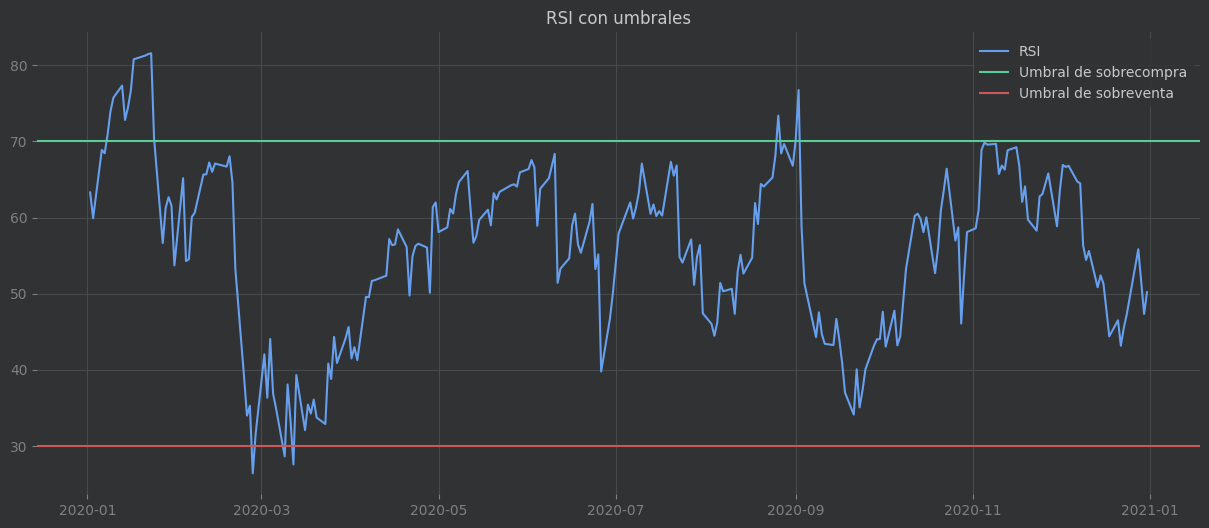

In [8]:
# Plot the RSI with the overbuy and overell threshold

# Adapt the size of the graph
plt.figure(figsize=(15,6))

# View the RSI
plt.plot(f["rsi"].loc["2020"])

# View horizontal line for the Overbuy threshold (RSI=70)
plt.axhline(70, color="#57CE95")

# View horizontal line for the Oversell threshold (RSI=30)
plt.axhline(30, color="#CE5757")

# Put a title
plt.title("RSI con umbrales")

# Put a legend
plt.legend(["RSI", "Umbral de sobrecompra", "Umbral de sobreventa"])

# Show the graph
plt.show()

# Secci√≥n 2: Crear una estrategia basada en el RSI

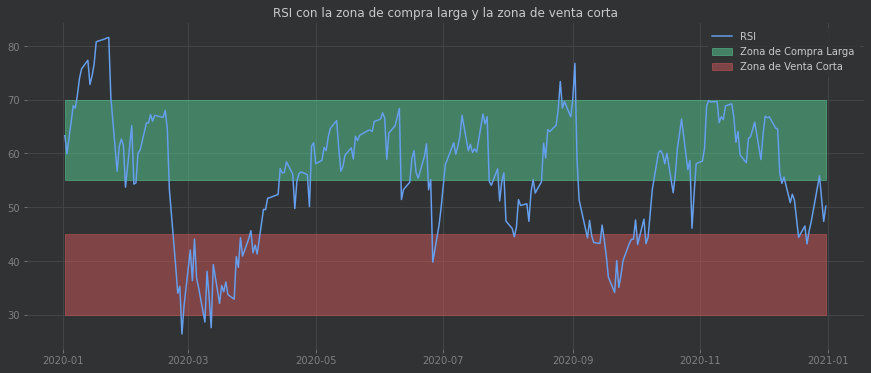

In [ ]:
# Representar el RSI con la zona de compra larga y la zona de venta corta
 
# Adaptar el tama√±o del gr√°fico
plt.figure(figsize=(15,6))

# Ver el RSI
plt.plot(f["rsi"].loc["2020"])

# Ver la l√≠nea horizontal para el umbral de sobrecompra  (RSI=70)
plt.fill_between(f["rsi"].loc["2020"].index,55,
                 70,55<70, color="#57CE95",
                  alpha=0.5)

# Ver la l√≠nea horizontal para el umbral de sobreventa (RSI=30)
plt.fill_between(f["rsi"].loc["2020"].index,45,
                 30,30<45, color="#CE5757",
                  alpha=0.5)
# Colocar el t√≠tulo
plt.title("RSI con la zona de compra larga y la zona de venta corta")

# A√±adir la leyenda
plt.legend(["RSI", "Zona de Compra Larga", "Zona de Venta Corta"])

# Representar el gr√°fico
plt.show()

In [ ]:
# Definimos cuando la estrategia debe tomar una compra larga o una venta corta

# Necesitamos definir la se√±al de apertura en largo y la se√±al de cierre en largo

# Ponemos el umbral
overbuy = 70
neutral_buy = 55

# Poner valores nan para las columnas de la se√±al larga
f["signal_long"] = np.nan
f["yersteday_rsi"] = f["rsi"].shift(1)
# Necesitamos definir la se√±al de apertura en largo (RSI ayer<55 y RSI hoy>55)
f.loc[(f["rsi"]>neutral_buy) & (f["yersteday_rsi"]<neutral_buy), "signal_long"] = 1

# Necesitamos definir la se√±al cierre en largo (RSI ayer>55 y RSI hoy<55) Se√±al falsa
f.loc[(f["rsi"]<neutral_buy)&(f["yersteday_rsi"]>neutral_buy), "signal_long"] = 0

# Necesitamos definir la se√±al cierre en largo (RSI yersteday<70 y RSI today>70) Se√±al de sobrecompra
f.loc[(f["rsi"]>overbuy)&(f["yersteday_rsi"]<overbuy), "signal_long"] = 0


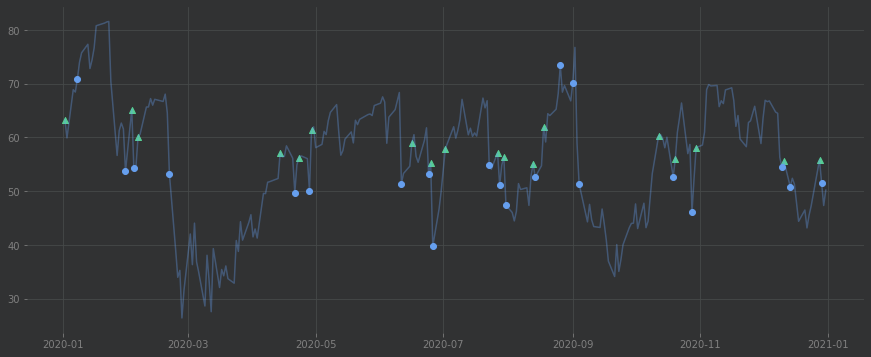

In [ ]:
# Representamos todas las se√±ales para asegurarnos de que son correctas

# Seleccionar todas las se√±ales en una lista de √≠ndices para representar s√≥lo estos puntos
idx_open = f.loc[f["signal_long"]==1].loc["2020"].index
idx_close = f.loc[f["signal_long"]==0].loc["2020"].index


# Adaptar el tama√±o del gr√°fico
plt.figure(figsize=(15,6))

# Traza los puntos de la apertura de se√±al larga en verde
plt.scatter(f.loc[idx_open]["rsi"].index, f.loc[idx_open]["rsi"].loc["2020"], color= "#57CE95", marker="^")

# Traza los puntos del cierre de se√±al larga en azul
plt.scatter(f.loc[idx_close]["rsi"].index, f.loc[idx_close]["rsi"].loc["2020"], color= "#669FEE", marker="o")

# Representamos el rsi para asegurarse de que las condiciones se completan
plt.plot(f["rsi"].loc["2020"].index, f["rsi"].loc["2020"], alpha=0.35)

# Representamos el gr√°fico
plt.show() 

In [ ]:
# Definimos cuando la estrategia debe tomar una compra larga o una venta corta

# ******************************************************************************
# Necesitamos definir la se√±al de Abrir la posici√≥n Corta y Cerrar la posici√≥n Corta

# Ponemos el umbral
oversell = 30
neutral_sell= 45

# Poner valores nan para las columnas de la se√±al larga
f["signal_short"] = np.nan
f["yersteday_rsi"] = f["rsi"].shift(1)
# Necesitamos definir la se√±al de apertura en corto (RSI ayer>45 y RSI hoy<45)
f.loc[(f["rsi"]<neutral_sell) & (f["yersteday_rsi"]>neutral_sell), "signal_short"] = -1

# Necesitamos definir la se√±al de cierre en corto (RSI ayer<45 y RSI hoy>45) Se√±al falsa
f.loc[(f["rsi"]>neutral_sell)&(f["yersteday_rsi"]<neutral_sell), "signal_short"] = 0

# Necesitamos definir la se√±al de cierre en corto (RSI ayer>30 y RSI hoy<30) Se√±al de sobre venta
f.loc[(f["rsi"]<oversell)&(f["yersteday_rsi"]>oversell), "signal_short"] = 0

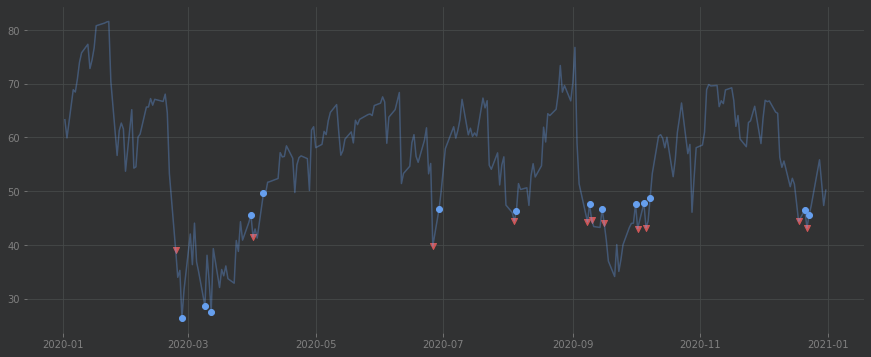

In [ ]:
#Representamos todas las se√±ales para asegurarnos de que son correctas

# Seleccionar todas las se√±ales en una lista de √≠ndices para representar s√≥lo estos puntos
idx_open = f.loc[f["signal_short"]==-1].loc["2020"].index
idx_close = f.loc[f["signal_short"]==0].loc["2020"].index

# Adaptar el tama√±o del gr√°fico
plt.figure(figsize=(15,6))

# Traza los puntos de la apertura de se√±al corta en rojo
plt.scatter(f.loc[idx_open]["rsi"].index, f.loc[idx_open]["rsi"].loc["2020"], color= "#CE5757", marker="v")

# Traza los puntos del cierre de se√±al corta en azul
plt.scatter(f.loc[idx_close]["rsi"].index, f.loc[idx_close]["rsi"].loc["2020"], color= "#669FEE", marker="o")

# Representamos el rsi para asegurarse de que las condiciones se completan
plt.plot(f["rsi"].loc["2020"].index, f["rsi"].loc["2020"], alpha=0.35)

# Representamos el gr√°fico
plt.show()

In [ ]:
f["Position"] = (f["signal_short"].fillna(method="ffill")+ f["signal_long"].fillna(method="ffill"))
f.dropna(thresh = 10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-05-21   26.572046   26.885336   26.522682   26.873220   26.873220   
2014-06-03   27.474070   27.541386   27.053225   27.172398   27.172398   
2014-06-05   27.245197   27.671528   27.147964   27.619171   27.619171   
2014-06-12   27.788706   27.823112   27.347916   27.492022   27.492022   
2014-06-19   27.636126   27.674021   27.350409   27.669035   27.669035   
...                ...         ...         ...         ...         ...   
2022-07-05  107.514503  114.052597  106.249496  113.887001  113.887001   
2022-07-07  116.008003  119.862000  115.533997  119.306000  119.306000   
2022-07-11  118.650002  118.794502  116.234497  116.522499  116.522499   
2022-07-18  113.440002  114.800003  109.300003  109.910004  109.910004   
2022-07-19  111.730003  114.809998  110.500000  114.620003  114.620003   

              Volume        rsi  signal_long  yersteday_rsi  signal_short  \
Date                                                                        
2014-05-21  23925508  55.712614          1.0      50.162364           NaN   
2014-06-03  37332215  52.273429          0.0      58.679792           NaN   
2014-06-05  33782496  57.582689          1.0      52.082732           NaN   
2014-06-12  29169867  53.063554          0.0      59.181959           NaN   
2014-06-19  49136535  55.422956          1.0      54.405384           NaN   
...              ...        ...          ...            ...           ...   
2022-07-05  36398000  51.507395          NaN      43.591942           0.0   
2022-07-07  32184000  58.914769          1.0      53.449047           NaN   
2022-07-11  26718000  53.642465          0.0      59.981217           NaN   
2022-07-18  33354000  43.877694          NaN      48.190007          -1.0   
2022-07-19  30992300  51.571639          NaN      43.877694           0.0   

            Position  
Date                  
2014-05-21       1.0  
2014-06-03       0.0  
2014-06-05       1.0  
2014-06-12       0.0  
2014-06-19       1.0  
...              ...  
2022-07-05       0.0  
2022-07-07       1.0  
2022-07-11       0.0  
2022-07-18      -1.0  
2022-07-19       0.0  

[504 rows x 11 columns]

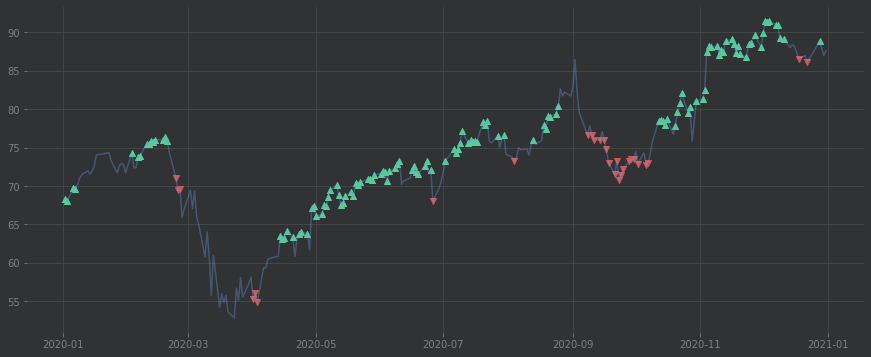

In [ ]:
# We plot all the signal to be sure that they be correct
year = "2020"
idx_long = f.loc[f["Position"]==1].loc[year].index
idx_short = f.loc[f["Position"]==-1].loc[year].index

# Adapt the size of the graph
plt.figure(figsize=(15,6))

# Plot the points of the short signal in red
plt.scatter(f.loc[idx_short]["Adj Close"].index, f.loc[idx_short]["Adj Close"].loc[year], color= "#CE5757", marker="v")

# Plot the points of the long signal in green
plt.scatter(f.loc[idx_long]["Adj Close"].index, f.loc[idx_long]["Adj Close"].loc[year], color= "#57CE95", marker="^")

# Plot the rsi to be sure that the conditions are completed
plt.plot(f["Adj Close"].loc[year].index, f["Adj Close"].loc[year], alpha=0.35)

# Show the graph
plt.show()

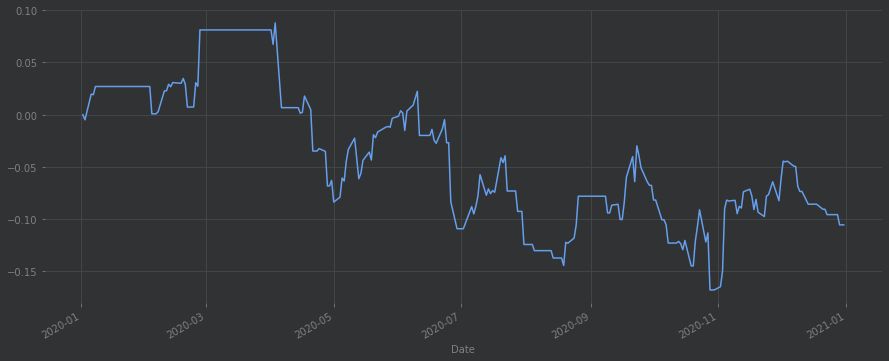

In [ ]:
# Calcular el porcentaje de variaci√≥n del activo
f["pct"] = f["Adj Close"].pct_change(1)

# Calcular la rentabilidad de la estrategia
f["return"] = f["pct"]*(f["Position"].shift(1))

#(1,2,3,-1) --> (1,3,6,5)
f["return"].loc["2020"].cumsum().plot(figsize=(15,6))

# Crear una funci√≥n para hacer la estrategia RSI m√°s tarde



In [ ]:
def RSI(val, neutral, window):
  """ 
        ------------------------------------------------------------------------------
        | Output: La funci√≥n da los rendimientos de la estrategia RSI                |
        ------------------------------------------------------------------------------
        | Inputs: -val (type dataframe pandas): Valores de entrada de la acci√≥n      |
        |         -neutral (float): Valor neutral, es decir, zona de no acci√≥n       |
        |         -window (float): per√≠odo de balanceo para el RSI                   |
        ------------------------------------------------------------------------------
  """

  # Print Error if there is no column Adj Close in the dataframe
  if "Adj Close" not in val.columns:
    ValueError("Necesitamos tener un nombre de columna Adj Close porque todos los c√°lculos se refieren a esta columna")
  
  val["rsi"] = ta.momentum.RSIIndicator(val["Adj Close"], window=window).rsi()


  
  """Se√±al de compra en largo """
  # Colocamos el umbral
  overbuy = 70
  neutral_buy = 50 + neutral

  # Poner valores nan para las columnas de la se√±al larga
  val["signal_long"] = np.nan
  val["yersteday_rsi"] = val["rsi"].shift(1)
  # Necesitamos definir la se√±al de apertura en largo (RSI ayer<55 y RSI hoy>55)
  val.loc[(val["rsi"]>neutral_buy) & (val["yersteday_rsi"]<neutral_buy), "signal_long"] = 1

  # Necesitamos definir la se√±al cierre en largo (RSI ayer>55 y RSI hoy<55) Se√±al falsa
  val.loc[(val["rsi"]<neutral_buy)&(val["yersteday_rsi"]>neutral_buy), "signal_long"] = 0

  # Necesitamos definir la se√±al cierre en largo (RSI ayer<70 y RSI hoy>70) Se√±al de sobrecompra
  val.loc[(val["rsi"]>overbuy)&(val["yersteday_rsi"]<overbuy), "signal_long"] = 0



  """Se√±al de venta en corto """
  # Colocamos el umbral
  oversell = 30
  neutral_sell = 50 - neutral

  # Poner valores nan para las columnas de la se√±al larga
  val["signal_short"] = np.nan
  val["yersteday_rsi"] = val["rsi"].shift(1)
  # Necesitamos definir la se√±al de apertura en corto (RSI ayer>45 y RSI hoy<45)
  val.loc[(val["rsi"]<neutral_sell) & (val["yersteday_rsi"]>neutral_sell), "signal_short"] = -1

  # Necesitamos definir la se√±al de cierre en corto (RSI ayer<45 y RSI hoy>45) Se√±al falsa
  val.loc[(val["rsi"]>neutral_sell)&(val["yersteday_rsi"]<neutral_sell), "signal_short"] = 0

  # Necesitamos definir la se√±al de cierre en corto (RSI ayer>30 y RSI hoy<30) Se√±al de sobre venta
  val.loc[(val["rsi"]<oversell)&(val["yersteday_rsi"]>oversell), "signal_short"] = 0

  """Calcular el retorno """
  # Calculamos el porcentaje de variaci√≥n del activo
  val["pct"] = val["Adj Close"].pct_change(1)

  # Calculamos las posiciones
  val["Position"] = (val["signal_short"].fillna(method="ffill")+ val["signal_long"].fillna(method="ffill"))

  # Calculamos el valor de retorno de la estrategia
  val["return"] = val["pct"]*(val["Position"].shift(1))

  return val["return"]

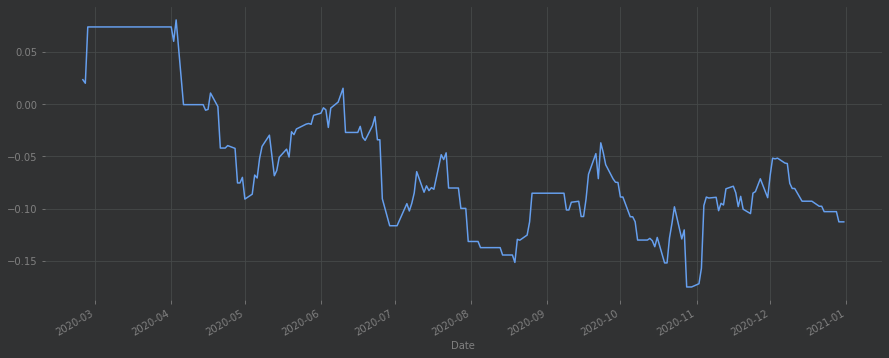

In [ ]:
RSI(f.loc["2020"],5, 14).cumsum().plot(figsize=(15,6))